In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from intESN import intESN
import matplotlib.pyplot as plt

In [2]:
# dataset
# freq = np.concatenate(([1] * 40, [0.5] * 50, [0.2] * 30, [1] * 30, [0.1] * 50, [0.2] * 20, [1] * 30, [0.5] * 50))
# freq = np.fromfunction(lambda i: 1.0 / i, (300,), dtype=int)


data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code

train_size = 3000
test_size = 1000
X_train = np.array([np.ones(train_size)])
y_train = np.array([data[:train_size]])

X_test = np.array([np.ones(test_size)])
y_test = np.array([data[train_size:train_size+test_size]])

X_train = np.reshape(X_train, (1, 2000, 1))
y_train = np.reshape(y_train, (1, 2000, 1))

X_test = np.reshape(X_test, (1, 2000, 1))
y_test = np.reshape(y_test, (1, 2000, 1))


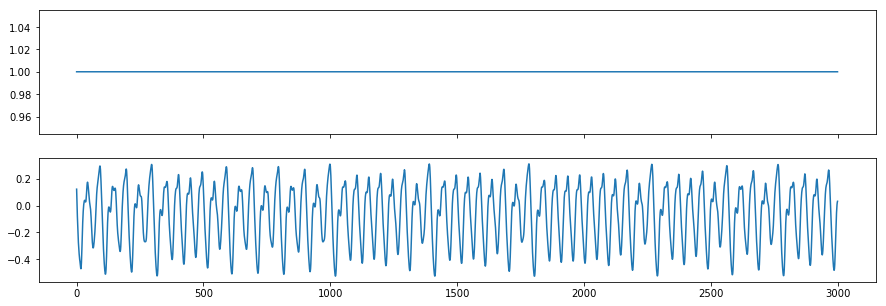

In [12]:
# show data
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5), sharex=True)
ax1.plot(np.arange(len(X_train[0])), X_train[0])
ax2.plot(np.arange(len(X_train[0])), y_train[0])

plt.show()

In [4]:
# dimensnions
# K: inputs , N: neurons, L: outputs
K = 1
N = 10000
L = 1

# projection !!!
# TODO: refactor me to usea proper HDC framework
sensitivity = 200
levels = np.linspace(-1.0, 1.0, sensitivity)
ref_vectors = np.array([np.random.choice([-1.0, 0.0, 1.0], size=N) for i in range(2)])
# hd_map = np.array([np.random.choice([-1.0, 0.0, 1.0], size=N) for i in range(len(levels) + 1)])

# quantization function
def quantize(value):
#     print(value)
    level = np.digitize(value, levels)
    section = int(level / float(sensitivity) * N)
    
    return np.append(ref_vectors[0][:section], ref_vectors[1][section:])
#     return hd_map[np.digitize(value, levels)]

model = intESN(N, K, L, quantize, q_output=quantize, output_fb=True, clip=13)

In [5]:
# train model
model.fit(X_train, y_train, discard=0.05)

0.305748984409


In [6]:
# test
pred = model.predict(X_test, y_test, reset=False)

(1, 1000, 1)
0.19884127616


In [9]:
# display results
# red: predictions
# grey: ground truth

plt.figure(figsize=(18,2))
plt.plot(np.arange(2000, 4000), pred[0], 'r')
plt.plot(np.arange(4000), data[:4000], 'k', alpha=0.5)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (2000,) and (1000, 1)